3. Assignment on Improving Performance of Classifier Models
A SMS unsolicited mail (every now and then known as cell smartphone junk mail) is any junk
message brought to a cellular phone as textual content messaging via the Short Message Service
(SMS). Use probabilistic approach (Naive Bayes Classifier / Bayesian Network)to implement SMS
Spam Filtering system. SMS messages are categorized as SPAM or HAM using features like length of
message, word depend, unique keywords etc.
Download Data -Set from : http://archive.ics.uci.edu/ml/datasets/sms+spam+collection
This dataset is composed by just one text file, where each line has the correct class followed by
the raw message.
A. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
necessary
B. Perform data-preparation (Train-Test Split)
C. Apply at least two Machine Learning Algorithms and Evaluate Models
D. Apply Cross-Validation and Evaluate Models and compare performance.
E. Apply Hyper parameter tuning and evaluate models and compare performance

In [1]:
hin= "\u0930\u094B\u0936\u0928\u0940 \u0917\u094C\u0921\u093C"
print("Developed by",hin)

Developed by रोशनी गौड़


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from scipy.cluster.hierarchy import set_link_color_palette
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('./Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
#Shape
shape = df.shape
print("Number of Samples:", shape[0])
print("Number of Features:", shape[1])

Number of Samples: 200
Number of Features: 5


In [101]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(x.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [103]:
#Data Preprocessing
print("\nMissing Values in Selected Features:")
print(x.isnull().sum())

# If missing values exist drop rows with missing values
if x.isnull().values.any():
    x = x.dropna()
    print("\nMissing values found and removed.")
else:
    print("\nNo missing values found.")


Missing Values in Selected Features:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values found.


In [105]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
# Normalizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert scaled data back to a DataFrame for easier handling
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)

print(x_train_scaled_df.head())

   Annual Income (k$)  Spending Score (1-100)
0           -0.241904               -0.371138
1            2.394554                0.843840
2           -0.864401               -0.978626
3           -1.193959               -1.434243
4            0.307358                0.236351


k=2: WCSS=211.9312, Silhouette Score=0.2551
k=3: WCSS=147.5507, Silhouette Score=0.3119
k=4: WCSS=88.0264, Silhouette Score=0.5157
k=5: WCSS=52.5481, Silhouette Score=0.5668
k=6: WCSS=46.0161, Silhouette Score=0.4218
k=7: WCSS=37.8432, Silhouette Score=0.3962
k=8: WCSS=36.2676, Silhouette Score=0.3226
k=9: WCSS=30.9867, Silhouette Score=0.4771
k=10: WCSS=22.9505, Silhouette Score=0.4131
k=11: WCSS=20.7813, Silhouette Score=0.3945
k=12: WCSS=18.7074, Silhouette Score=0.3834
k=13: WCSS=16.3301, Silhouette Score=0.3495
k=14: WCSS=15.2919, Silhouette Score=0.3274
k=15: WCSS=14.2261, Silhouette Score=0.2943


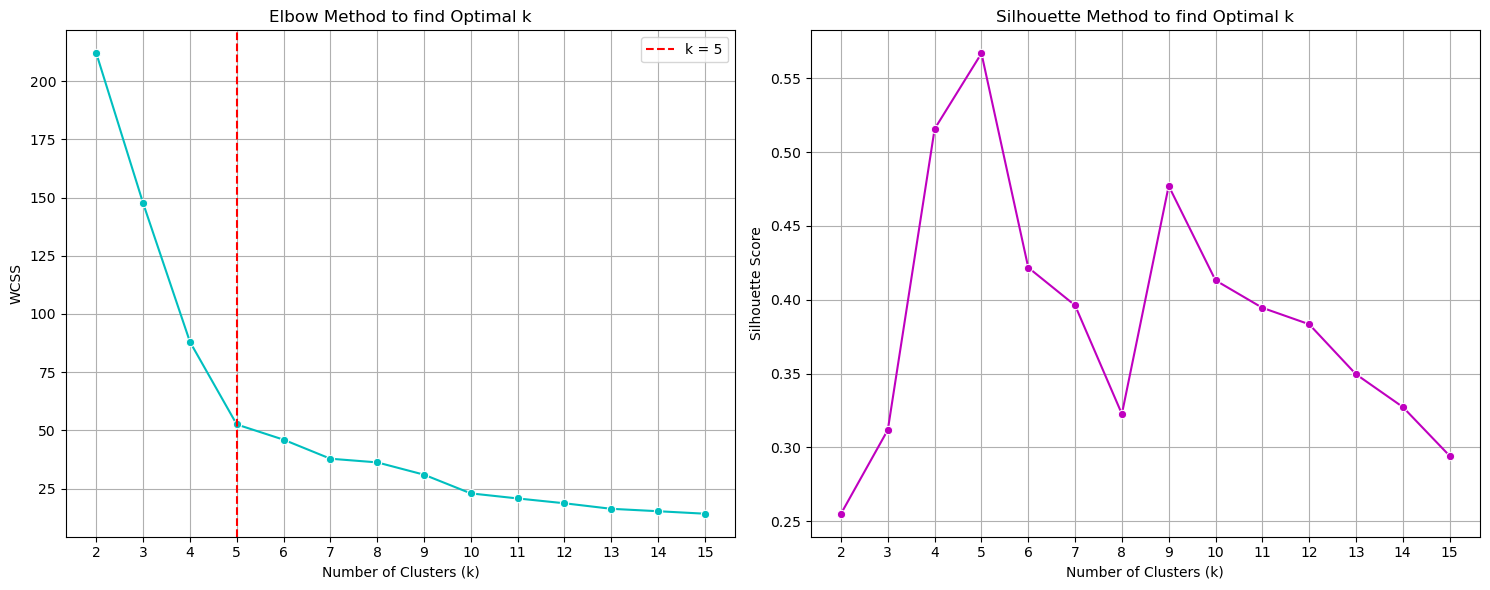

In [107]:
# Elbow and Silhouette Method combined
wcss = []  # To store WCSS for Elbow
silhouette_scores = []  #store Silhouette Scores

k_range = range(2, 16) 

for k in k_range:
    # Initialize KMeans with k clusters
    km = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans on the training data
    km.fit(x_train_scaled)
    
    # Calculate WCSS (Within-Cluster Sum of Squares) for training data
    wcss.append(km.inertia_)
    
    # Predict cluster labels for testing data
    labels_test = km.predict(x_test_scaled)
    
    # Calculate Silhouette Score on testing data
    score = silhouette_score(x_test_scaled, labels_test)
    silhouette_scores.append(score)
    
    print(f"k={k}: WCSS={km.inertia_:.4f}, Silhouette Score={score:.4f}")

# Assuming k_range, wcss & silhouette_scores are defined
# k_range = range(1, 11)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.lineplot(x=k_range, y=wcss, marker='o', color='c', ax=axes[0])
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Elbow Method to find Optimal k')
axes[0].set_xticks(k_range)
axes[0].grid(True)
axes[0].axvline(x=5, color='red', linestyle='--', label='k = 5')
axes[0].legend()

sns.lineplot(x=k_range, y=silhouette_scores, marker='o', color='m', ax=axes[1])
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method to find Optimal k')
axes[1].set_xticks(k_range)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [108]:
# Assuming k_range_silhouette is the list of k values tested
k_range_silhouette = list(range(2, 11))  # Adjust the range based on your k values

optimal_k_elbow = 5 
print(f"\nOptimal k based on Elbow Method: {optimal_k_elbow}")

# Determine k with highest Silhouette Score
optimal_k_silhouette = k_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k based on Silhouette Method: {optimal_k_silhouette}")

final_optimal_k = round((optimal_k_elbow + optimal_k_silhouette) / 2)
print(f"Final Optimal number of clusters (k): {final_optimal_k}")


Optimal k based on Elbow Method: 5
Optimal k based on Silhouette Method: 5
Final Optimal number of clusters (k): 5


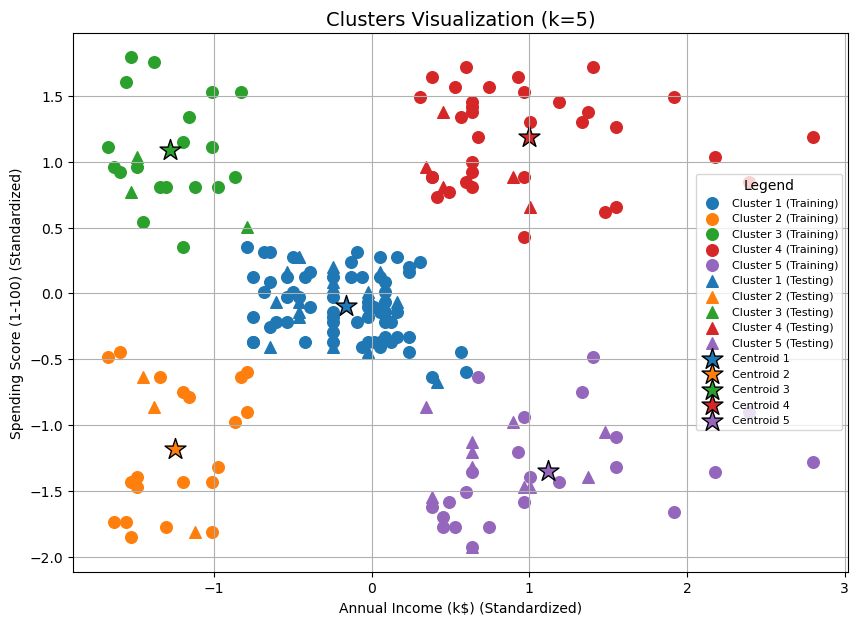

In [49]:
# Final KMeans clustering with determined no. of clusters
final_kmeans = KMeans(n_clusters=final_optimal_k, random_state=42)
final_kmeans.fit(x_train_scaled)

# Predict cluster labels for both training testing sets
train_labels = final_kmeans.labels_
test_labels = final_kmeans.predict(x_test_scaled)

# Get centroids for clusters
centroids = final_kmeans.cluster_centers_

# Define colors for each cluster
colors = sns.color_palette('tab10', n_colors=final_optimal_k)

# Plot clusters for training n testing data points
plt.figure(figsize=(10, 7))

# Plot training data points as circles
for i in range(final_optimal_k):
    plt.scatter(x_train_scaled[train_labels == i, 0], 
                x_train_scaled[train_labels == i, 1], 
                color=colors[i], 
                label=f"Cluster {i+1} (Training)", 
                marker='o',
                s=70)
# Plot testing data points as triangles
for i in range(final_optimal_k):
    plt.scatter(x_test_scaled[test_labels == i, 0], 
                x_test_scaled[test_labels == i, 1], 
                color=colors[i], 
                label=f"Cluster {i+1} (Testing)", 
                marker='^', 
                s=70)
# Plot centroids as stars and label them individually
for i in range(final_optimal_k):
    plt.scatter(centroids[i, 0], centroids[i, 1], 
                marker='*', 
                color=colors[i], 
               edgecolor='black',
                s=250, 
                label=f'Centroid {i+1}')
plt.title(f"Clusters Visualization (k={final_optimal_k})", fontsize=14)
plt.xlabel("Annual Income (k$) (Standardized)")
plt.ylabel("Spending Score (1-100) (Standardized)")

# Adding legend
plt.legend(loc="best", title="Legend", fontsize=8)

plt.grid(True)
plt.show()

In [111]:
# Function to compute scatter matrix (covariance matrix) for each cluster represents the scatter within the cluster
def scatter_matrix_within_cluster(cluster_points):
    cov_matrix = np.cov(cluster_points.T)  # Transpose 
    return cov_matrix

# Calculate scatter matrix (covariance matrix) for each cluster
scatter_matrices = []
for i in range(final_optimal_k):
    # Select points belonging to i-th cluster
    cluster_points = x_train_scaled[train_labels == i]
    
    # Compute scatter (covariance) matrix for this cluster
    scatter_matrices.append(scatter_matrix_within_cluster(cluster_points))

# trace of each scatter matrix = sum of its diagonal elements (measure of the variance or scatter within each cluster
scatter_within_clusters = [np.trace(matrix) for matrix in scatter_matrices]

# avg within-cluster scatter (variance)
average_within_cluster_scatter = np.mean(scatter_within_clusters)

print(f"Average Within-Cluster Scatter (Covariance Matrix Trace): {average_within_cluster_scatter:.2f}")

Average Within-Cluster Scatter (Covariance Matrix Trace): 0.37


In [113]:
# Clustering Performance
# Between-Cluster Distance
optimal_k = final_optimal_k  

# Compute pairwise distances between centroids
distance_matrix = pairwise_distances(centroids)

# Since distance_matrix is symmetric and diagonal is 0, sum upper triangle
triu_indices = np.triu_indices(optimal_k, k=1)
between_cluster_distance = distance_matrix[triu_indices].sum()

print(f"Between-Cluster Distance: {between_cluster_distance:.4f}")

Between-Cluster Distance: 22.8369


In [131]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
silhouette_scores_cv = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    km_cv = KMeans(n_clusters=optimal_k, random_state=42)
    km_cv.fit(x_train)
    labels_cv = km_cv.predict(x_test)
    score = silhouette_score(x_test, labels_cv)
    silhouette_scores_cv.append(score)

# Display Cross-Validation Results
print("K-Fold Cross-Validation Silhouette Scores:", silhouette_scores_cv)
average_score = np.mean(silhouette_scores_cv)
print(f"Average Cross-Validation Silhouette Score: {average_score:.4f}")

K-Fold Cross-Validation Silhouette Scores: [0.4376163681984092, 0.4938442424601795, 0.5956799477209869, 0.5020053882052744, 0.5767174023672377, 0.4666083052127603, 0.4268090522565252, 0.6585874317612024, 0.5179428865669555, 0.5598984062696272]
Average Cross-Validation Silhouette Score: 0.5236


In [116]:
# Average of All Cluster Centroids
# Calculate average of centroids
avg_centroid = np.mean(centroids, axis=0)
print(f"Average of All Cluster Centroids: {avg_centroid}")

Average of All Cluster Centroids: [-0.11424558 -0.07112693]


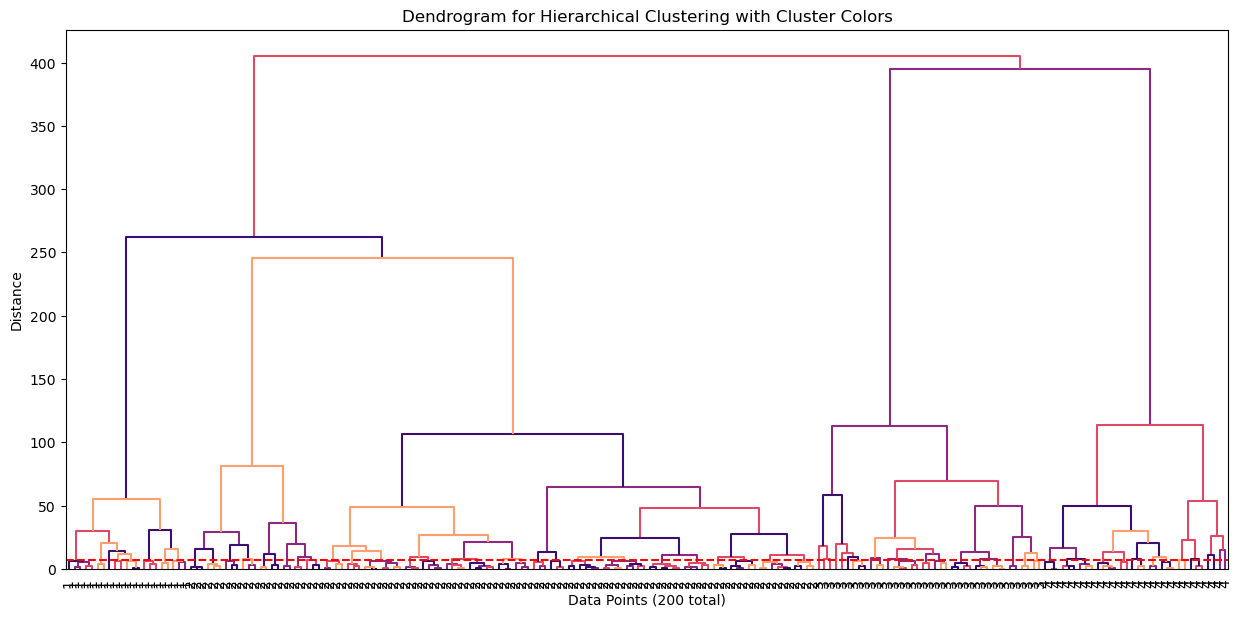

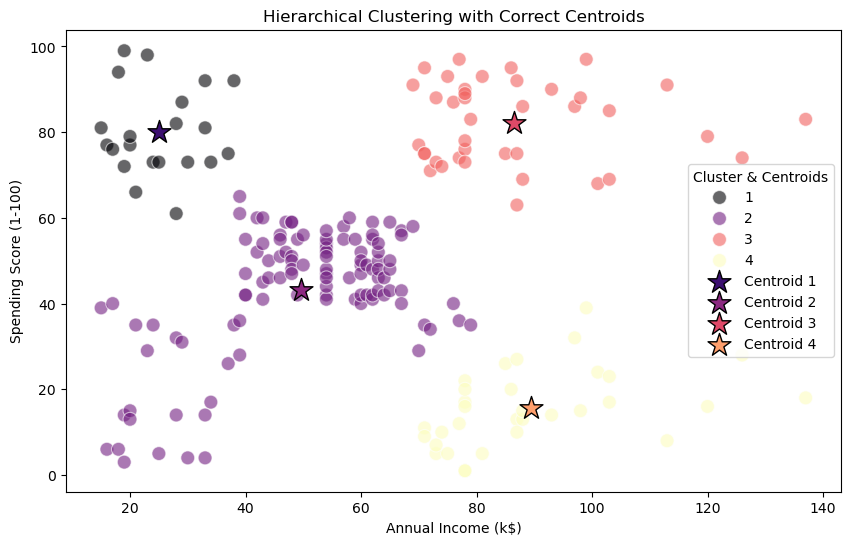

In [125]:
# Assuming x_all is your data, and you have already defined final_optimal_k
Z = linkage(x, method='ward')

# Create a color palette for the dendrogram corresponding to the clusters
final_optimal_k = 4  # Set the number of clusters to 4
cluster_palette = sns.color_palette("magma", final_optimal_k).as_hex()
set_link_color_palette([color[1:] for color in cluster_palette])

# Assign clusters based on the linkage
hier_labels = fcluster(Z, t=final_optimal_k, criterion='maxclust')

# Calculate centroids for the hierarchical clusters based on the original scaled data
centroids_unscaled = []
for i in range(1, final_optimal_k + 1):
    # Calculate the mean of the points in each cluster
    cluster_points = x.iloc[hier_labels == i]  # Use the original x data
    centroid = cluster_points.mean(axis=0)
    centroids_unscaled.append(centroid)

centroids_unscaled = np.array(centroids_unscaled)

# Plot the dendrogram with colors corresponding to clusters
plt.figure(figsize=(15, 7))
plt.title('Dendrogram for Hierarchical Clustering with Cluster Colors')
dendro = dendrogram(Z, truncate_mode=None, p=200, labels=hier_labels, leaf_rotation=90, 
                    leaf_font_size=10, link_color_func=lambda k: cluster_palette[k % final_optimal_k])

plt.xlabel('Data Points (200 total)')
plt.ylabel('Distance')
plt.axhline(y=7, color='red', linestyle='--')  # Adjust this value based on where you want to cut
plt.show()

# Scatter plot to display the clusters and centroids
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering with Correct Centroids')

# Plot the data points colored by their hierarchical cluster labels
sns.scatterplot(x=x['Annual Income (k$)'], 
                y=x['Spending Score (1-100)'], 
                hue=hier_labels, 
                palette='magma', 
                s=100, alpha=0.6, edgecolor='w')

# Plot centroids with colors corresponding to their clusters
for i, centroid in enumerate(centroids_unscaled):
    plt.scatter(centroid[0], centroid[1], s=300, marker='*', 
                color=sns.color_palette('magma', final_optimal_k)[i], 
                label=f'Centroid {i+1}', edgecolor='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster & Centroids')
plt.show()

In [121]:
#  Within-Cluster Distance (Scattering)
within_cluster_distance = 0
for i in range(final_optimal_k):
    # Select points in the i-th cluster
    cluster_points = x.iloc[hier_labels == (i + 1)]  # (i + 1) cause hier_labels starts from 1
    centroid = centroids_unscaled[i]
    # Sum of squared distances from each point centroid
    within_cluster_distance += np.sum((cluster_points - centroid) ** 2)

# Convert to scalar if it's a Series (in case of any unexpected behavior)
within_cluster_distance_scalar = within_cluster_distance if isinstance(within_cluster_distance, (int, float)) else within_cluster_distance.sum()

print(f"Within-Cluster Distance (Scattering): {within_cluster_distance_scalar:.4f}")

# Between-Cluster Distance
# Calculate distance matrix for centroids
distance_matrix = pairwise_distances(centroids_unscaled)
# upper triangle indices (without diagonal) to calculate between-cluster distance
triu_indices = np.triu_indices(final_optimal_k, k=1)
between_cluster_distance = distance_matrix[triu_indices].sum()

print(f"Between-Cluster Distance: {between_cluster_distance:.4f}")

#  Average of All Centroids
average_centroid = np.mean(centroids_unscaled, axis=0)

print(f"Average of All Centroids: {np.round(average_centroid, 4)}")

Within-Cluster Distance (Scattering): 75274.6025
Between-Cluster Distance: 365.6316
Average of All Centroids: [62.6419 55.2225]
